In [68]:
import pandas as pd
import lightgbm as lgb
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

In [36]:
df_test = pd.read_csv("merged_test.csv", header=None)

In [37]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,62ca195944401fed240b385fa47bd155,0c6bc6449d4d4820898868330d9c5517ca100921,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,33,False,False,False
1,62ca195944401fed240b385fa47bd155,f48d6ed4c5403495655995a3fd12f41841ec319,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,3,False,False,False
2,62ca195944401fed240b385fa47bd155,1c45210433d89c96c20fbc333f45b72ad2de69f,4166,833,83,3333,675,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,17,False,False,False
3,62ca195944401fed240b385fa47bd155,656785af4f2359802b72f5df73affbc55176ea0b,4166,500,83,3333,83,375,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,1,False,False,False
4,62ca195944401fed240b385fa47bd155,f723dabd44f495359b60e657f3df4600f1640b2,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,13,False,False,False


In [38]:
df_test.columns = ["tracing_id", "zpid_hash", "feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8","user_id_hash", "timestamp_session", "user_session_id", "order", "submit", "fav", "click"]

In [39]:
df_test.head()

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,user_id_hash,timestamp_session,user_session_id,order,submit,fav,click
0,62ca195944401fed240b385fa47bd155,0c6bc6449d4d4820898868330d9c5517ca100921,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,33,False,False,False
1,62ca195944401fed240b385fa47bd155,f48d6ed4c5403495655995a3fd12f41841ec319,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,3,False,False,False
2,62ca195944401fed240b385fa47bd155,1c45210433d89c96c20fbc333f45b72ad2de69f,4166,833,83,3333,675,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,17,False,False,False
3,62ca195944401fed240b385fa47bd155,656785af4f2359802b72f5df73affbc55176ea0b,4166,500,83,3333,83,375,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,1,False,False,False
4,62ca195944401fed240b385fa47bd155,f723dabd44f495359b60e657f3df4600f1640b2,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,13,False,False,False


In [40]:
df_test.click = df_test.click.replace({ True: 1, False: 0})
df_test.submit = df_test.submit.replace({True: 1, False: 0})
df_test.fav = df_test.fav.replace({True: 1, False: 0})

In [41]:
df_test.head()

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,user_id_hash,timestamp_session,user_session_id,order,submit,fav,click
0,62ca195944401fed240b385fa47bd155,0c6bc6449d4d4820898868330d9c5517ca100921,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,33,0,0,0
1,62ca195944401fed240b385fa47bd155,f48d6ed4c5403495655995a3fd12f41841ec319,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,3,0,0,0
2,62ca195944401fed240b385fa47bd155,1c45210433d89c96c20fbc333f45b72ad2de69f,4166,833,83,3333,675,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,17,0,0,0
3,62ca195944401fed240b385fa47bd155,656785af4f2359802b72f5df73affbc55176ea0b,4166,500,83,3333,83,375,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,1,0,0,0
4,62ca195944401fed240b385fa47bd155,f723dabd44f495359b60e657f3df4600f1640b2,4166,833,83,3333,83,166,1833,3,591451d586ff228f1766748cb9ed2ba92847c237,2022-07-10 00:12:09.977,1d6fdd41f1f74ed9b13a7c0de133ac11_2022_07_10_00_1,13,0,0,0


In [42]:
tracing_id_test = df_test.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [43]:
X_test = df_test.copy()
X_test.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_test = df_test['click']

In [44]:
y_test

0           0
1           0
2           0
3           0
4           0
           ..
12576028    0
12576029    0
12576030    0
12576031    1
12576032    1
Name: click, Length: 12576033, dtype: int64

In [45]:
df_train = pd.read_csv("merged_train.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,62ca168a98fd2bedc46c779d5d67fe63,463897814a03102a0051b4b389322c38467e3228,3125,625,812,3418,1809,125,3875,1235,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,8,False,False,False
1,62ca168a98fd2bedc46c779d5d67fe63,cca96c372e5786e29fde67290b2b619923632b8f,3125,625,812,3418,62,873,3875,62,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,23,False,False,False
2,62ca168a98fd2bedc46c779d5d67fe63,fd81a047cc0e5f70df8e16b8341525a9e805270c,3125,625,812,2831,62,873,3875,2055,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,32,False,False,False
3,62ca168a98fd2bedc46c779d5d67fe63,ec9e2dd55440073f7faf6b35ad5d7ce1973c4dac,3125,625,812,3418,1809,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,7,False,False,False
4,62ca168a98fd2bedc46c779d5d67fe63,66579c4be9fa3755c5a73cc919c0fbda4e97e903,3125,625,812,3418,1241,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,37,False,False,False


In [46]:
df_train.columns = ["tracing_id", "zpid_hash", "feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "feature8","user_id_hash", "timestamp_session", "user_session_id", "order", "submit", "fav", "click"]

In [47]:
df_train.head()

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,user_id_hash,timestamp_session,user_session_id,order,submit,fav,click
0,62ca168a98fd2bedc46c779d5d67fe63,463897814a03102a0051b4b389322c38467e3228,3125,625,812,3418,1809,125,3875,1235,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,8,False,False,False
1,62ca168a98fd2bedc46c779d5d67fe63,cca96c372e5786e29fde67290b2b619923632b8f,3125,625,812,3418,62,873,3875,62,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,23,False,False,False
2,62ca168a98fd2bedc46c779d5d67fe63,fd81a047cc0e5f70df8e16b8341525a9e805270c,3125,625,812,2831,62,873,3875,2055,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,32,False,False,False
3,62ca168a98fd2bedc46c779d5d67fe63,ec9e2dd55440073f7faf6b35ad5d7ce1973c4dac,3125,625,812,3418,1809,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,7,False,False,False
4,62ca168a98fd2bedc46c779d5d67fe63,66579c4be9fa3755c5a73cc919c0fbda4e97e903,3125,625,812,3418,1241,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,37,False,False,False


In [48]:
df_train.click = df_train.click.replace({ True: 1, False: 0})
df_train.submit = df_train.submit.replace({True: 1, False: 0})
df_train.fav = df_train.fav.replace({True: 1, False: 0})

In [49]:
df_train.head()

,tracing_id,zpid_hash,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,user_id_hash,timestamp_session,user_session_id,order,submit,fav,click
0,62ca168a98fd2bedc46c779d5d67fe63,463897814a03102a0051b4b389322c38467e3228,3125,625,812,3418,1809,125,3875,1235,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,8,0,0,0
1,62ca168a98fd2bedc46c779d5d67fe63,cca96c372e5786e29fde67290b2b619923632b8f,3125,625,812,3418,62,873,3875,62,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,23,0,0,0
2,62ca168a98fd2bedc46c779d5d67fe63,fd81a047cc0e5f70df8e16b8341525a9e805270c,3125,625,812,2831,62,873,3875,2055,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,32,0,0,0
3,62ca168a98fd2bedc46c779d5d67fe63,ec9e2dd55440073f7faf6b35ad5d7ce1973c4dac,3125,625,812,3418,1809,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,7,0,0,0
4,62ca168a98fd2bedc46c779d5d67fe63,66579c4be9fa3755c5a73cc919c0fbda4e97e903,3125,625,812,3418,1241,125,3875,645,c04d14926f4396571a3a11b79fc783d508f60f37,2022-07-10 00:00:10.710,60be6d73744040b08ab63975a2fcbdeb_2022_07_10_00_1,37,0,0,0


In [50]:
tracing_id_train = df_train.groupby("tracing_id")["tracing_id"].count().to_numpy()

In [51]:
X_train = df_train.copy()
X_train.drop(columns=["click", "tracing_id", "user_session_id","user_id_hash", "timestamp_session", "zpid_hash", "order", "fav", "submit"], inplace=True)
y_train= df_train['click']

In [52]:
ranker1 = lgb.LGBMRanker(
                    objective="lambdarank",
                    boosting_type = "gbdt",
                    n_estimators = 20,
                    importance_type = "gain",
                    metric= "ndcg",
                    num_leaves = 10,
                    learning_rate = 0.05,
                    max_depth = -1,
                    label_gain =[i for i in range(max(y_train.max(), y_test.max()) + 1)])

In [53]:
ranker1.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train,tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's ndcg@1: 0.346332	training's ndcg@2: 0.357576	training's ndcg@5: 0.403256	training's ndcg@10: 0.462756	training's ndcg@20: 0.529163	valid_1's ndcg@1: 0.346973	valid_1's ndcg@2: 0.358192	valid_1's ndcg@5: 0.403805	valid_1's ndcg@10: 0.463272	valid_1's ndcg@20: 0.529909
[2]	training's ndcg@1: 0.356842	training's ndcg@2: 0.366397	training's ndcg@5: 0.41114	training's ndcg@10: 0.47028	training's ndcg@20: 0.53609	valid_1's ndcg@1: 0.356985	valid_1's ndcg@2: 0.366524	valid_1's ndcg@5: 0.411425	valid_1's ndcg@10: 0.470742	valid_1's ndcg@20: 0.536577
[3]	training's ndcg@1: 0.361397	training's ndcg@2: 0.370615	training's ndcg@5: 0.415052	training's ndcg@10: 0.473916	training's ndcg@20: 0.539332	valid_1's ndcg@1: 0.361471	valid_1's ndcg@2: 0.370735	valid_1's ndcg@5: 0.415379	valid_1's ndcg@10: 0.474387	valid_1's ndcg@20: 0.539908
[4]	training's ndcg@1: 0.364619	training's ndcg@2: 0.373729	training's ndcg@5: 0.417955	training's ndcg@10: 0.476809	training's ndcg@20: 0.541785	valid_1'

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='ndcg', n_estimators=20, num_leaves=10,
           objective='lambdarank')

In [54]:
ranker2 = lgb.LGBMRanker(
                    objective="lambdarank",
                    boosting_type = "gbdt",
                    n_estimators = 10,
                    importance_type = "gain",
                    metric= "map",
                    num_leaves = 10,
                    learning_rate = 0.05,
                    max_depth = -1,
                    label_gain =[i for i in range(max(y_train.max(), y_test.max()) + 1)])

In [56]:
ranker2.fit(
      X=X_train,
      y=y_train,
      group=tracing_id_train,
      eval_set=[(X_train, y_train),(X_test, y_test)],
      eval_group=[tracing_id_train, tracing_id_test],
      eval_at=[1, 2, 5, 10, 20])

[1]	training's map@1: 0.346332	training's map@2: 0.334242	training's map@5: 0.348317	training's map@10: 0.375988	training's map@20: 0.403714	valid_1's map@1: 0.346973	valid_1's map@2: 0.334708	valid_1's map@5: 0.348623	valid_1's map@10: 0.376359	valid_1's map@20: 0.404247
[2]	training's map@1: 0.356842	training's map@2: 0.342228	training's map@5: 0.355339	training's map@10: 0.383022	training's map@20: 0.410716	valid_1's map@1: 0.356985	valid_1's map@2: 0.342239	valid_1's map@5: 0.355344	valid_1's map@10: 0.38317	valid_1's map@20: 0.41096
[3]	training's map@1: 0.361397	training's map@2: 0.346087	training's map@5: 0.358807	training's map@10: 0.386449	training's map@20: 0.414064	valid_1's map@1: 0.361471	valid_1's map@2: 0.346032	valid_1's map@5: 0.358825	valid_1's map@10: 0.386598	valid_1's map@20: 0.414331
[4]	training's map@1: 0.364619	training's map@2: 0.348854	training's map@5: 0.361335	training's map@10: 0.389045	training's map@20: 0.416553	valid_1's map@1: 0.364731	valid_1's map@2:

LGBMRanker(importance_type='gain', label_gain=[0, 1], learning_rate=0.05,
           metric='map', n_estimators=10, num_leaves=10,
           objective='lambdarank')

In [63]:
df_train.corr()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,order,submit,fav,click
feature1,1.000000,0.143044,0.167025,0.229782,0.118437,0.075416,0.140034,0.107296,-0.040306,-0.000350,0.012396,0.010031
feature2,0.143044,1.000000,0.153237,0.325797,0.262713,0.287811,0.117743,0.086901,-0.130529,0.001545,0.013344,0.065186
feature3,0.167025,0.153237,1.000000,0.186679,0.138432,0.126025,0.663090,0.561946,0.018768,0.000981,0.002255,-0.007792
feature4,0.229782,0.325797,0.186679,1.000000,0.207544,0.188265,0.152800,0.119332,-0.097173,-0.000568,0.011505,0.047714
feature5,0.118437,0.262713,0.138432,0.207544,1.000000,0.261618,0.107352,0.086833,-0.160152,0.006421,0.021644,0.107380
feature6,0.075416,0.287811,0.126025,0.188265,0.261618,1.000000,0.098293,0.089103,-0.109406,0.004428,0.012364,0.076934
feature7,0.140034,0.117743,0.663090,0.152800,0.107352,0.098293,1.000000,0.620995,0.001606,0.001131,0.001036,-0.002564
feature8,0.107296,0.086901,0.561946,0.119332,0.086833,0.089103,0.620995,1.000000,-0.016479,0.002200,0.000626,0.002456
order,-0.040306,-0.130529,0.018768,-0.097173,-0.160152,-0.109406,0.001606,-0.016479,1.000000,-0.006185,-0.018072,-0.162037
submit,-0.000350,0.001545,0.000981,-0.000568,0.006421,0.004428,0.001131,0.002200,-0.006185,1.000000,0.017076,0.029733


<AxesSubplot:>

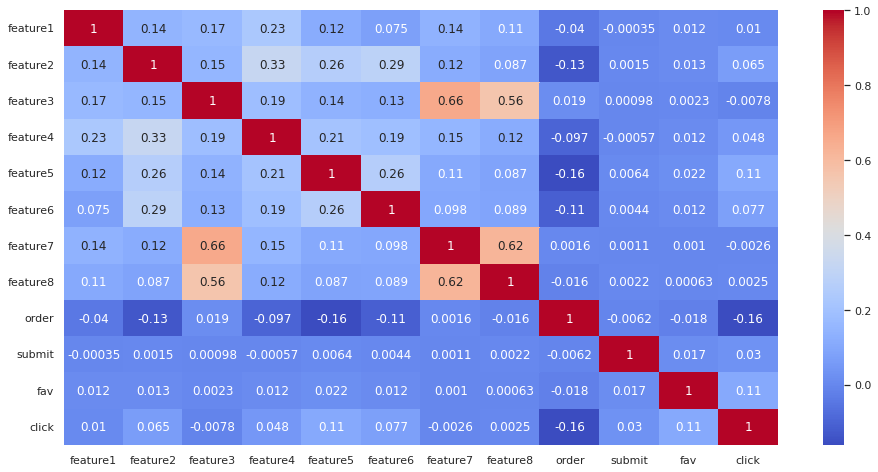

In [69]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df_train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
